In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('Leads.csv')

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [4]:
## dropping prospect id and Lead Number.

# They dont affect the model and neither help the model to recognise any patterns either.

df = df.drop(['Lead Number','Prospect ID'], axis=1)

In [5]:
import numpy as np

# checking the missing values

features_with_NaN = [features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_NaN:
    print(f"{feature}: %{np.round(df[feature].isnull().mean(),4)} of missing values.")
    
    

Lead Source: %0.0039 of missing values.
TotalVisits: %0.0148 of missing values.
Page Views Per Visit: %0.0148 of missing values.
Last Activity: %0.0111 of missing values.
Country: %0.2663 of missing values.
Specialization: %0.1556 of missing values.
How did you hear about X Education: %0.2389 of missing values.
What is your current occupation: %0.2911 of missing values.
What matters most to you in choosing a course: %0.2932 of missing values.
Tags: %0.3629 of missing values.
Lead Quality: %0.5159 of missing values.
Lead Profile: %0.2932 of missing values.
City: %0.1537 of missing values.
Asymmetrique Activity Index: %0.4565 of missing values.
Asymmetrique Profile Index: %0.4565 of missing values.
Asymmetrique Activity Score: %0.4565 of missing values.
Asymmetrique Profile Score: %0.4565 of missing values.


In [6]:
# missing values present in numerical features
numerical_feat = [f for f in df.columns if df[f].isnull().sum()>0 and df[f].dtypes != 'O']
for feature in numerical_feat:
    print(f"{feature} is a {df[feature].dtype}")

TotalVisits is a float64
Page Views Per Visit is a float64
Asymmetrique Activity Score is a float64
Asymmetrique Profile Score is a float64


In [7]:
# missing values present in categorical features
cat_feat = [f for f in df.columns if df[f].isnull().sum()>0 and df[f].dtypes == 'O']
for feature in cat_feat:
    print(f"{feature} is a {df[feature].dtype}")

Lead Source is a object
Last Activity is a object
Country is a object
Specialization is a object
How did you hear about X Education is a object
What is your current occupation is a object
What matters most to you in choosing a course is a object
Tags is a object
Lead Quality is a object
Lead Profile is a object
City is a object
Asymmetrique Activity Index is a object
Asymmetrique Profile Index is a object


In [8]:
# handling the missing values:

for feature in numerical_feat:
    df[feature].fillna(df[feature].median(), inplace=True)

for feature in cat_feat:
    df[feature].fillna(df[feature].mode()[0], inplace=True)  

C:\Users\ishaa\AppData\Local\Temp\ipykernel_7724\3152799786.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].median(), inplace=True)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_7724\3152799786.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [9]:
df[features_with_NaN].isnull().sum()

Lead Source                                      0
TotalVisits                                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Tags                                             0
Lead Quality                                     0
Lead Profile                                     0
City                                             0
Asymmetrique Activity Index                      0
Asymmetrique Profile Index                       0
Asymmetrique Activity Score                      0
Asymmetrique Profile Score                       0
dtype: int64

In [10]:
for f in df.columns:
    if df[f].dtype!='O':
        print(f"{f} - feature dtype: {df[f].dtype}")

Converted - feature dtype: int64
TotalVisits - feature dtype: float64
Total Time Spent on Website - feature dtype: int64
Page Views Per Visit - feature dtype: float64
Asymmetrique Activity Score - feature dtype: float64
Asymmetrique Profile Score - feature dtype: float64


In [11]:
# Label Encoding for binary categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
binary_cat = [f for f in df.columns if df[f].nunique() == 2]

for f in binary_cat:
    df[f] = le.fit_transform(df[f])
    print(f"the feature name is {f}")

the feature name is Do Not Email
the feature name is Do Not Call
the feature name is Converted
the feature name is Search
the feature name is Newspaper Article
the feature name is X Education Forums
the feature name is Newspaper
the feature name is Digital Advertisement
the feature name is Through Recommendations
the feature name is A free copy of Mastering The Interview


In [12]:
# for features which are ordinal 

# seeing number of unique values of the categorical features first:
for f in df.columns:
    if df[f].dtype=='O':
        print(f"{f}: number of unique values is {df[f].nunique()}")

Lead Origin: number of unique values is 5
Lead Source: number of unique values is 21
Last Activity: number of unique values is 17
Country: number of unique values is 38
Specialization: number of unique values is 19
How did you hear about X Education: number of unique values is 10
What is your current occupation: number of unique values is 6
What matters most to you in choosing a course: number of unique values is 3
Magazine: number of unique values is 1
Receive More Updates About Our Courses: number of unique values is 1
Tags: number of unique values is 26
Lead Quality: number of unique values is 5
Update me on Supply Chain Content: number of unique values is 1
Get updates on DM Content: number of unique values is 1
Lead Profile: number of unique values is 6
City: number of unique values is 7
Asymmetrique Activity Index: number of unique values is 3
Asymmetrique Profile Index: number of unique values is 3
I agree to pay the amount through cheque: number of unique values is 1
Last Notab

In [13]:
# selecting only the categorical features with unique values upto 3:

ordinal_feat = []

for f in df.columns:
    if df[f].dtype=='O' and df[f].nunique() <= 3:
        print(f"{f}: unique values are {df[f].unique()}")
        ordinal_feat.append(f)
    

What matters most to you in choosing a course: unique values are ['Better Career Prospects' 'Flexibility & Convenience' 'Other']
Magazine: unique values are ['No']
Receive More Updates About Our Courses: unique values are ['No']
Update me on Supply Chain Content: unique values are ['No']
Get updates on DM Content: unique values are ['No']
Asymmetrique Activity Index: unique values are ['02.Medium' '01.High' '03.Low']
Asymmetrique Profile Index: unique values are ['02.Medium' '01.High' '03.Low']
I agree to pay the amount through cheque: unique values are ['No']


In [14]:
# converting the ordinal categorical features into numericals. 

df['Asymmetrique Activity Index'] = le.fit_transform(df['Asymmetrique Activity Index'])
df['Asymmetrique Profile Index'] = le.fit_transform(df['Asymmetrique Profile Index'])



In [15]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,...,No,Select,Select,1,1,15.0,15.0,No,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,1,1,15.0,15.0,No,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,1,0,14.0,20.0,No,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,1,0,13.0,17.0,No,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,1,0,15.0,18.0,No,0,Modified


In [16]:
low_var_feat = [f for f in df.columns if df[f].nunique() == 1]
df.drop(columns=low_var_feat, inplace=True)
df.head()


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,...,Interested in other courses,Low in Relevance,Select,Select,1,1,15.0,15.0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,Ringing,Might be,Select,Select,1,1,15.0,15.0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,1,0,14.0,20.0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,...,Ringing,Not Sure,Select,Mumbai,1,0,13.0,17.0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,Will revert after reading the email,Might be,Select,Mumbai,1,0,15.0,18.0,0,Modified


In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Step 1: Separate target
y = df['Converted']
X = df.drop('Converted', axis=1)

# Step 2: Get remaining categorical features from X only
remaining_cat = [f for f in X.columns if X[f].dtype == 'O']

# Step 3: Apply ColumnTransformer on X
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), remaining_cat)
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(X)
X = pd.DataFrame(X_encoded, columns=preprocessor.get_feature_names_out())



In [18]:
# 1. Remove low variance features
low_var_feat = [f for f in X.columns if X[f].nunique() == 1]
X.drop(columns=low_var_feat, inplace=True)

# 2. Remove highly correlated features
import numpy as np

# Compute absolute correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = np.triu(corr_matrix, k=1)

# Find features with correlation > 0.9
to_drop = [X.columns[i] for i in range(len(X.columns)) if any(upper[i] > 0.9)]

# Drop them
X.drop(columns=to_drop, inplace=True)

# 3. Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Initialize and train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 2. Make predictions
y_pred = model.predict(X_test)

# 3. Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[1052   55]
 [  78  663]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1107
           1       0.92      0.89      0.91       741

    accuracy                           0.93      1848
   macro avg       0.93      0.92      0.92      1848
weighted avg       0.93      0.93      0.93      1848


Accuracy Score: 0.928030303030303


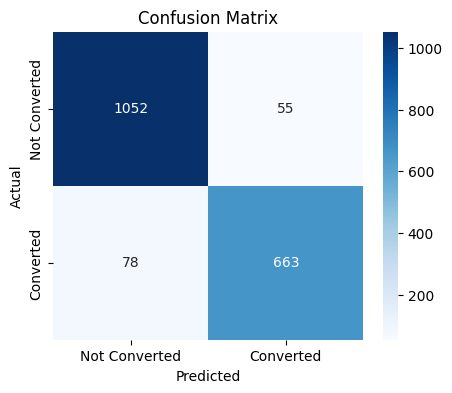

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


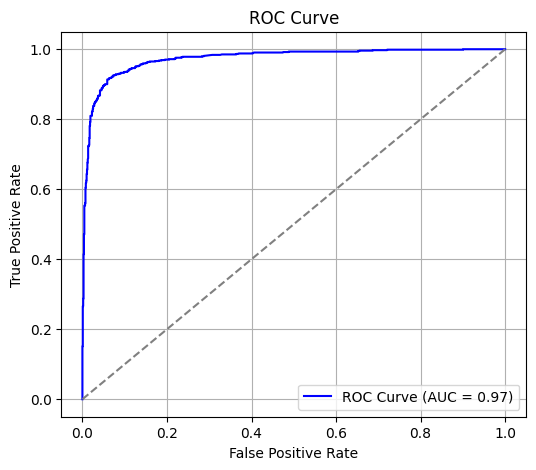

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [22]:
lead_scores = pd.DataFrame({
    'Lead_Index': X_test.argmax(axis=1),  # optional index reference
    'Conversion_Probability': y_prob,
    'Actual_Converted': y_test.values
})
lead_scores = lead_scores.sort_values(by='Conversion_Probability', ascending=False)

print("\nTop 10 High-Potential Leads:")
print(lead_scores.head(10))


Top 10 High-Potential Leads:
      Lead_Index  Conversion_Probability  Actual_Converted
1377          33                1.000000                 1
31           137                0.999999                 1
1315         117                0.999998                 1
1198          91                0.999997                 1
1488         109                0.999997                 1
74            16                0.999997                 1
1363         109                0.999997                 1
1030          83                0.999990                 1
991           16                0.999987                 1
501          109                0.999979                 1


In [23]:
!pip install pyttsx3


You should consider upgrading via the 'C:\Users\ishaa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [24]:
import pyttsx3
engine = pyttsx3.init()
engine.say("You have high-converting leads.")
engine.say(f"The top lead has a conversion chance of {round(lead_scores.iloc[0]['Conversion_Probability']*100, 2)} percent.")
engine.runAndWait()

In [25]:
feedback = input("\nWas this lead ranking useful? (yes/no): ")
if feedback.lower() == "no":
    reason = input("Please suggest what could be improved: ")
    print("Thanks! Your feedback is noted.")
else:
    print("Great! Glad it helped.")

Thanks! Your feedback is noted.
